In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler

In [2]:
#import train_data and test_data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#train_data
print (train.shape)
train.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#train_data columns
print (train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#show train col info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#test_data
print (test.shape)
test.describe()

(1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
#missing value

missdf=pd.concat([train.isnull().sum(),test.isnull().sum()],keys=['train_data', 'test_data'],axis =1)
missdf[missdf.sum(axis=1)>0.]

,train_data,test_data
MSZoning,0,4.0
LotFrontage,259,227.0
Alley,1369,1352.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0


In [10]:
#SalePrice
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

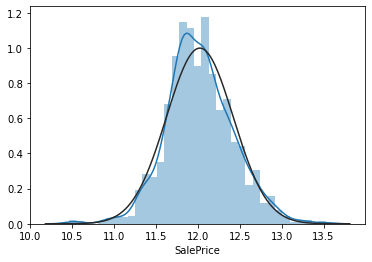

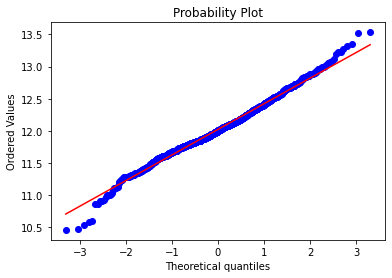

In [11]:
# SalePrice  
train['SalePrice'].value_counts()
train['SalePrice'].isnull().sum()
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

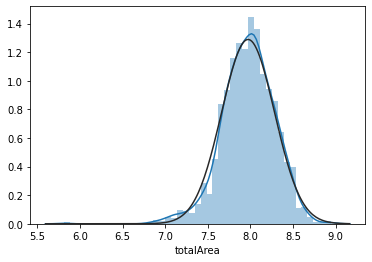

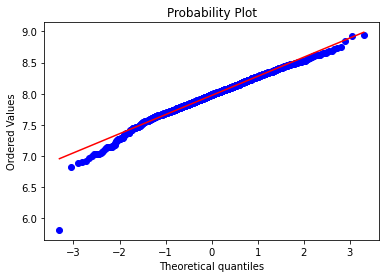

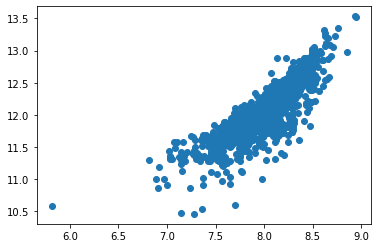

In [12]:
train['totalArea'] = train['GrLivArea'] + train['GarageArea'] + train['TotalBsmtSF']
train = train.drop(train[train['totalArea'] > 8000].index)
train['totalArea'] = np.log1p(train['totalArea'])
sns.distplot(train['totalArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['totalArea'], plot=plt)
fig = plt.figure()
plt.plot(train['totalArea'],train['SalePrice'],'o')

#test
test['GrLivArea'] = test['GrLivArea'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['totalArea'] = test['GrLivArea'] + test['GarageArea'] + test['TotalBsmtSF']
test['totalArea'] = np.log1p(test['totalArea'])

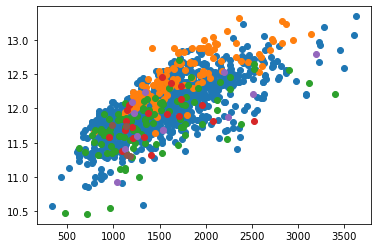

In [13]:
# SaleCondition 销售类型
# print(train['SaleCondition'].value_counts())
# train['SaleCondition'].isnull().sum()
# train = train[train['SaleCondition'] == 'Normal']
train = train.drop(train[train['GrLivArea'] > 4000].index)
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'Normal'],train['SalePrice'][train['SaleCondition'] == 'Normal'],'o')
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'Partial'],train['SalePrice'][train['SaleCondition'] == 'Partial'],'o')
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'Abnorml'],train['SalePrice'][train['SaleCondition'] == 'Abnorml'],'o')
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'Family'],train['SalePrice'][train['SaleCondition'] == 'Family'],'o')
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'Alloca'],train['SalePrice'][train['SaleCondition'] == 'Alloca'],'o')
plt.plot(train['GrLivArea'][train['SaleCondition'] == 'AdjLand'],train['SalePrice'][train['SaleCondition'] == 'AdjLand'],'o')

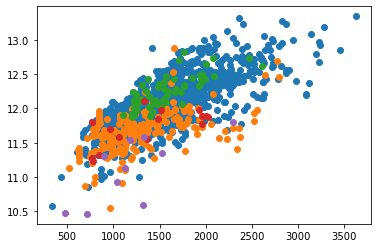

In [14]:
# MSSubClass 建筑的类别
# print(train['MSZoning'].value_counts())
# train['SaleCondition'].isnull().sum()
train = train.drop(train[(train['GrLivArea'] > 3000) & (train['MSZoning'] == 'RM')].index)
train = train.drop(train[(train['GrLivArea'] > 3000) & (train['MSZoning'] == 'RH')].index)
plt.plot(train['GrLivArea'][train['MSZoning'] == 'RL'],train['SalePrice'][train['MSZoning'] == 'RL'],'o')
plt.plot(train['GrLivArea'][train['MSZoning'] == 'RM'],train['SalePrice'][train['MSZoning'] == 'RM'],'o')
plt.plot(train['GrLivArea'][train['MSZoning'] == 'FV'],train['SalePrice'][train['MSZoning'] == 'FV'],'o')
plt.plot(train['GrLivArea'][train['MSZoning'] == 'RH'],train['SalePrice'][train['MSZoning'] == 'RH'],'o')
plt.plot(train['GrLivArea'][train['MSZoning'] == 'C (all)'],train['SalePrice'][train['MSZoning'] == 'C (all)'],'o')

#test
test['MSZoning'] = test['MSZoning'].fillna('RL')

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


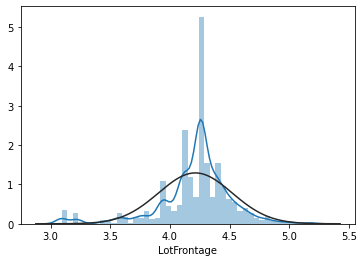

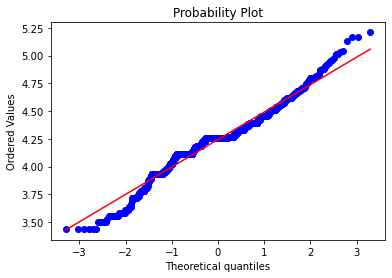

In [15]:
# LotFrontage 临街
# print(train['LotFrontage'].value_counts().sort_index())
train = train.drop(train[train['LotFrontage'] > 300].index)
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['not_LotFrontage'] = pd.Series(np.zeros((len(train))),index = train.index)
train['not_LotFrontage'][train['LotFrontage'] < 25] = 1
index = train['LotFrontage'] > 25

train['LotFrontage'] = np.log1p(train['LotFrontage'])
# # train['LotFrontage'].isnull().sum()
sns.distplot(train['LotFrontage'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['LotFrontage'][index], plot=plt)

# test
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['not_LotFrontage'] = pd.Series(np.zeros((len(test))),index = test.index)
test['not_LotFrontage'][test['LotFrontage'] < 25] = 1
test['LotFrontage'] = np.log1p(test['LotFrontage'])

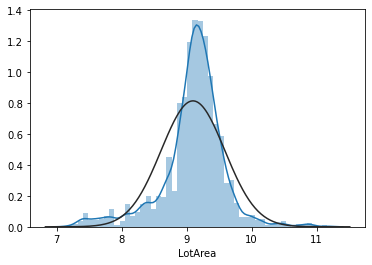

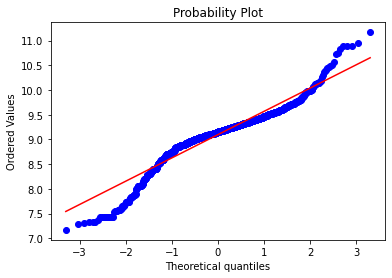

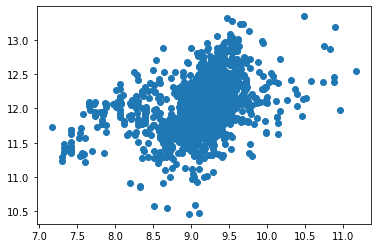

In [16]:
# LotArea
# print(train['LotArea'].value_counts().sort_index())
train = train.drop(train[train['LotArea'] > 100000].index)
train['LotArea'] = np.log1p(train['LotArea'])
sns.distplot(train['LotArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['LotArea'], plot=plt)
fig = plt.figure()
plt.plot(train['LotArea'],train['SalePrice'],'o')

# test
test['LotArea'] = np.log1p(test['LotArea'])

In [17]:
# Street Alley 街道 胡同
train = train.drop('Street', axis=1)
train = train.drop('Alley', axis=1)

#test
test = test.drop('Street', axis=1)
test = test.drop('Alley', axis=1)

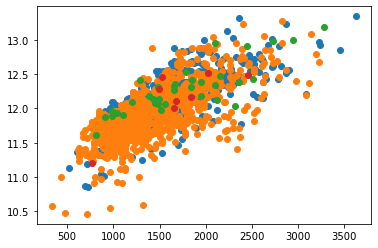

In [18]:
# LotShape 房屋的大致形状
# print(train['LotShape'].value_counts().sort_index())
# print(train['LotShape'].isnull().sum()/len(train))
plt.plot(train['GrLivArea'][train['LotShape'] == 'IR1'],train['SalePrice'][train['LotShape'] == 'IR1'],'o')
plt.plot(train['GrLivArea'][train['LotShape'] == 'Reg'],train['SalePrice'][train['LotShape'] == 'Reg'],'o')
plt.plot(train['GrLivArea'][train['LotShape'] == 'IR2'],train['SalePrice'][train['LotShape'] == 'IR2'],'o')
plt.plot(train['GrLivArea'][train['LotShape'] == 'IR3'],train['SalePrice'][train['LotShape'] == 'IR3'],'o')

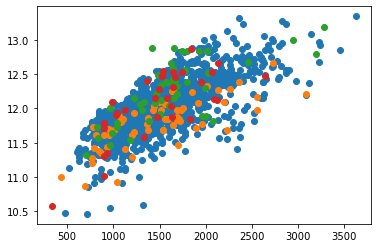

In [19]:
# LandContour 物业
# print(train['LandContour'].value_counts().sort_index())
# print(train['LandContour'].isnull().sum()/len(train))
plt.plot(train['GrLivArea'][train['LandContour'] == 'Lvl'],train['SalePrice'][train['LandContour'] == 'Lvl'],'o')
plt.plot(train['GrLivArea'][train['LandContour'] == 'Bnk'],train['SalePrice'][train['LandContour'] == 'Bnk'],'o')
plt.plot(train['GrLivArea'][train['LandContour'] == 'HLS'],train['SalePrice'][train['LandContour'] == 'HLS'],'o')
plt.plot(train['GrLivArea'][train['LandContour'] == 'Low'],train['SalePrice'][train['LandContour'] == 'Low'],'o')

In [20]:
# Utilities 公共设施可用度
# print(train['Utilities'].value_counts().sort_index())
# print(train['Utilities'].isnull().sum()/len(train))
train = train.drop('Utilities', axis=1)

#test
test = test.drop('Utilities', axis=1)

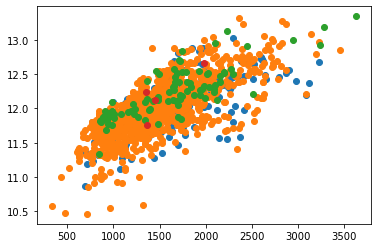

In [21]:
# LotConfig
# print(train['LotConfig'].value_counts().sort_index())
# print(train['LotConfig'].isnull().sum()/len(train))
plt.plot(train['GrLivArea'][train['LotConfig'] == 'Corner'],train['SalePrice'][train['LotConfig'] == 'Corner'],'o')
plt.plot(train['GrLivArea'][train['LotConfig'] == 'Inside'],train['SalePrice'][train['LotConfig'] == 'Inside'],'o')
plt.plot(train['GrLivArea'][train['LotConfig'] == 'CulDSac'],train['SalePrice'][train['LotConfig'] == 'CulDSac'],'o')
plt.plot(train['GrLivArea'][train['LotConfig'] == 'FR3'],train['SalePrice'][train['LotConfig'] == 'FR3'],'o')

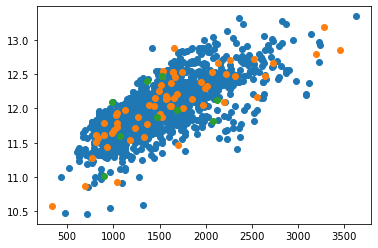

In [22]:
# LandSlope 坡度
# print(train['LandSlope'].value_counts().sort_index())
# print(train['LandSlope'].isnull().sum()/len(train))
plt.plot(train['GrLivArea'][train['LandSlope'] == 'Gtl'],train['SalePrice'][train['LandSlope'] == 'Gtl'],'o')
plt.plot(train['GrLivArea'][train['LandSlope'] == 'Mod'],train['SalePrice'][train['LandSlope'] == 'Mod'],'o')
plt.plot(train['GrLivArea'][train['LandSlope'] == 'Sev'],train['SalePrice'][train['LandSlope'] == 'Sev'],'o')

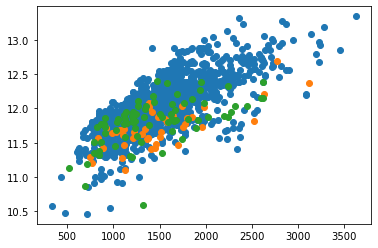

In [23]:
# Neighborhood  Condition1 Condition2位置
plt.plot(train['GrLivArea'][train['Condition1'] == 'Norm'],train['SalePrice'][train['Condition1'] == 'Norm'],'o')
plt.plot(train['GrLivArea'][train['Condition1'] == 'Artery'],train['SalePrice'][train['Condition1'] == 'Artery'],'o')
plt.plot(train['GrLivArea'][train['Condition1'] == 'Feedr'],train['SalePrice'][train['Condition1'] == 'Feedr'],'o')

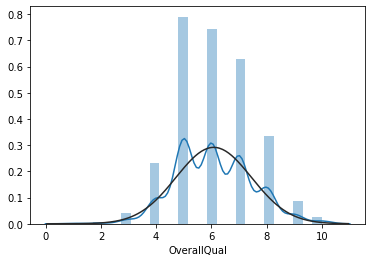

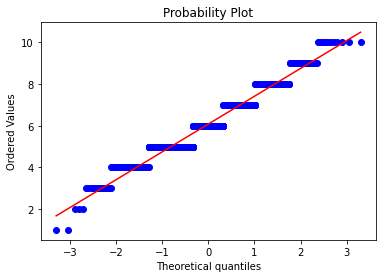

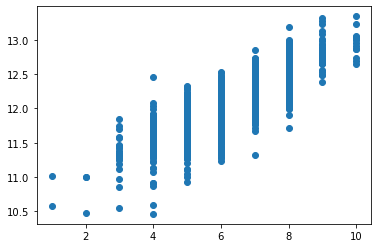

In [24]:
# BldgType 住宅风格
# print(train['OverallQual'].value_counts().sort_index())
# print(train['OverallQual'].isnull().sum()/len(train))
sns.distplot(train['OverallQual'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['OverallQual'], plot=plt)
fig = plt.figure()
plt.plot(train['OverallQual'],train['SalePrice'],'o')

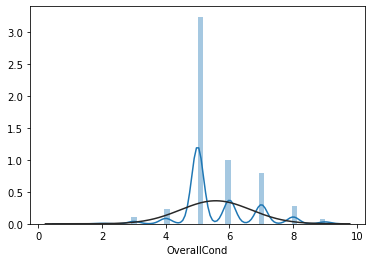

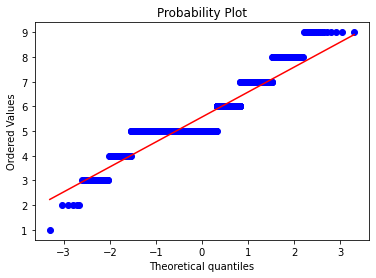

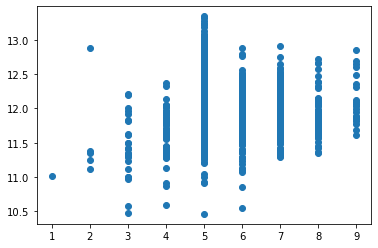

In [25]:
# OverallCond 总体状况评级
# print(train['OverallCond'].value_counts().sort_index())
# print(train['OverallCond'].isnull().sum()/len(train))
train = train.drop(train[(train['OverallCond'] ==2 )&(train['SalePrice'] > 300000 )].index)
sns.distplot(train['OverallCond'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['OverallCond'], plot=plt)
fig = plt.figure()
plt.plot(train['OverallCond'],train['SalePrice'],'o')

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


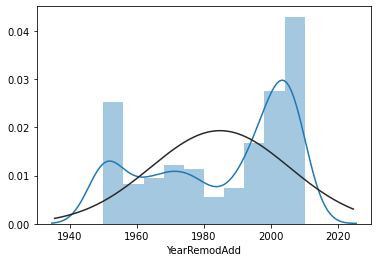

In [26]:
# YearRemodAdd
# print(train['YearRemodAdd'].value_counts().sort_index())
# print(train['YearRemodAdd'].isnull().sum()/len(train))
train['1950house']  = pd.Series(np.zeros((len(train))),index = train.index)
train['1950house'][train['YearRemodAdd'] == 1950]  = 1
sns.distplot(train['YearRemodAdd'], fit=norm)

#test
test['1950house']  = pd.Series(np.zeros((len(test))),index = test.index)
test['1950house'][test['YearRemodAdd'] == 1950]  = 1

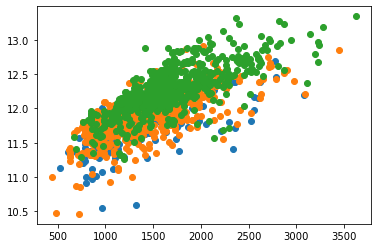

In [27]:
# Foundation
# print(train['Foundation'].value_counts().sort_index())
# print(train['Foundation'].isnull().sum()/len(train))
plt.plot(train['GrLivArea'][train['Foundation'] == 'BrkTil'],train['SalePrice'][train['Foundation'] == 'BrkTil'],'o')
plt.plot(train['GrLivArea'][train['Foundation'] == 'CBlock'],train['SalePrice'][train['Foundation'] == 'CBlock'],'o')
plt.plot(train['GrLivArea'][train['Foundation'] == 'PConc'],train['SalePrice'][train['Foundation'] == 'PConc'],'o')


In [28]:
# BsmtQual 地下室高度
train['BsmtQual'] = train['BsmtQual'].fillna("unknown")
train['BsmtCond'] = train['BsmtCond'].fillna("TA")
train['BsmtExposure'] = train['BsmtExposure'].fillna("unknown")
train['BsmtFinType1'] = train['BsmtFinType1'].fillna("unknown")

#test
test['BsmtQual'] = test['BsmtQual'].fillna("unknown")
test['BsmtCond'] = test['BsmtCond'].fillna("TA")
test['BsmtExposure'] = test['BsmtExposure'].fillna("unknown")
test['BsmtFinType1'] = test['BsmtFinType1'].fillna("unknown")

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


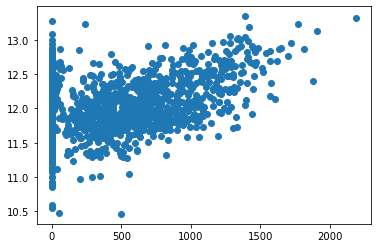

In [29]:
# print(train['BsmtFinSF1'].value_counts())
# print(train['BsmtFinSF1'].isnull().sum()/len(train))
train['noSF1']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noSF1'][train['BsmtFinSF1'] == 0]  = 1
plt.plot(train['BsmtFinSF1'],train['SalePrice'],'o')

# test
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)
test['noSF1']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noSF1'][test['BsmtFinSF1'] == 0]  = 1

In [30]:
# BsmtCond
train['BsmtCond'] = train['BsmtCond'].fillna(0)

#test 
test['BsmtCond'] = test['BsmtCond'].fillna(0)

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


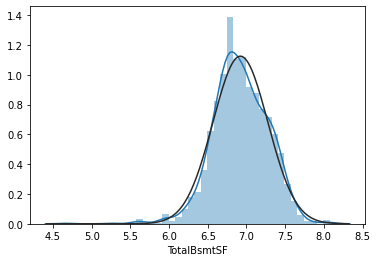

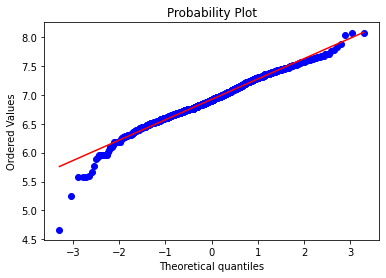

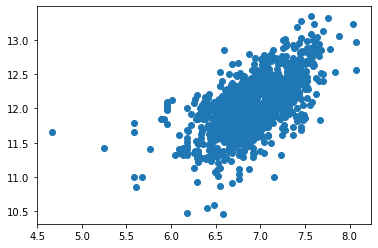

In [31]:
# print(train['BsmtUnfSF'].value_counts())
# print(train['TotalBsmtSF'].isnull().sum()/len(train))
train['noTotalBsmtSF']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noTotalBsmtSF'][train['TotalBsmtSF'] == 0]  = 1
index = train['TotalBsmtSF'] > 0
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
sns.distplot(train['TotalBsmtSF'][index], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'][index], plot=plt)
fig = plt.figure()
plt.plot(train['TotalBsmtSF'][index],train['SalePrice'][index],'o')

#test
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['noTotalBsmtSF']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noTotalBsmtSF'][test['TotalBsmtSF'] == 0]  = 1
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])

In [32]:
# Heating
train['Electrical'] = train['Electrical'].fillna('SBrkr')

# test
test['Electrical'] = test['Electrical'].fillna('SBrkr')

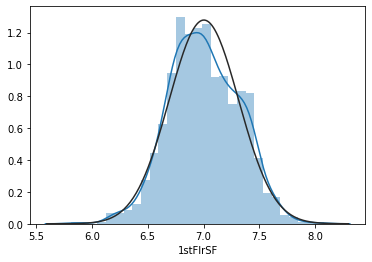

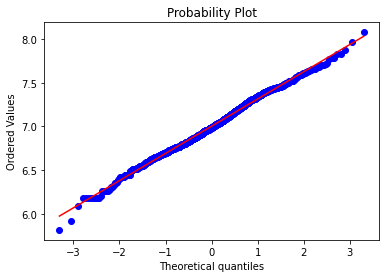

In [33]:
# print(train['1stFlrSF'].value_counts())
# print(train['1stFlrSF'].isnull().sum()/len(train))
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])
sns.distplot(train['1stFlrSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)

# test
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


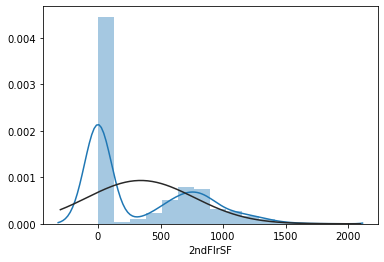

In [34]:
# print(train['2ndFlrSF'].value_counts())
# print(train['2ndFlrSF'].isnull().sum()/len(train))
train['no2ndFlrSF']  = pd.Series(np.zeros((len(train))),index = train.index)
train['no2ndFlrSF'][train['2ndFlrSF'] == 0]  = 1
sns.distplot(train['2ndFlrSF'], fit=norm)

# test
test['no2ndFlrSF']  = pd.Series(np.zeros((len(test))),index = test.index)
test['no2ndFlrSF'][test['2ndFlrSF'] == 0]  = 1

In [35]:
#LowQualFinSF
# print(train['LowQualFinSF'].value_counts())
# print(train['LowQualFinSF'].isnull().sum()/len(train))
train['haveLowQual']  = pd.Series(np.zeros((len(train))),index = train.index)
train['haveLowQual'][train['LowQualFinSF'] > 0]  = 1

# test
test['haveLowQual']  = pd.Series(np.zeros((len(test))),index = test.index)
test['haveLowQual'][test['LowQualFinSF'] > 0]  = 1

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


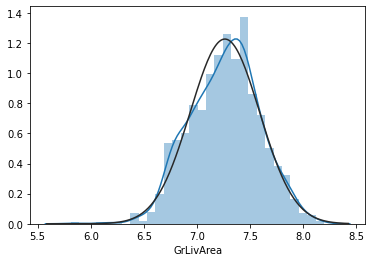

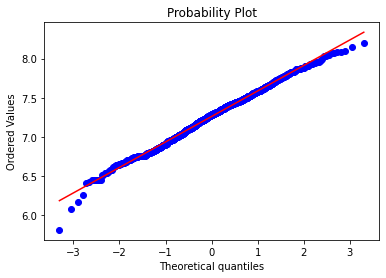

In [36]:
# GrLivArea
# print(train['LowQualFinSF'].value_counts())
# print(train['LowQualFinSF'].isnull().sum()/len(train))

train['GrLivArea'] = np.log1p(train['GrLivArea'])
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

#test
test['GrLivArea'] = np.log1p(test['GrLivArea'])

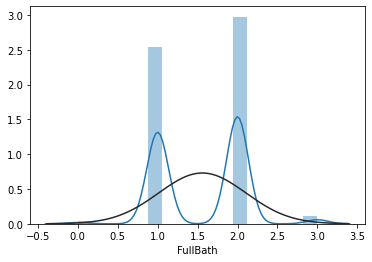

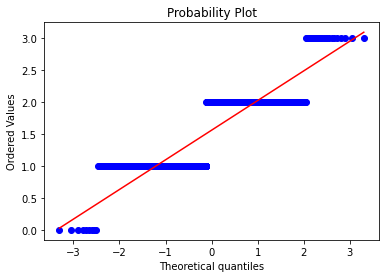

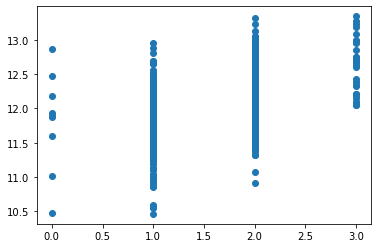

In [37]:
# FullBath
# print(train['FullBath'].value_counts())
# print(train['FullBath'].isnull().sum()/len(train))
sns.distplot(train['FullBath'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['FullBath'], plot=plt)
fig = plt.figure()
plt.plot(train['FullBath'],train['SalePrice'],'o')

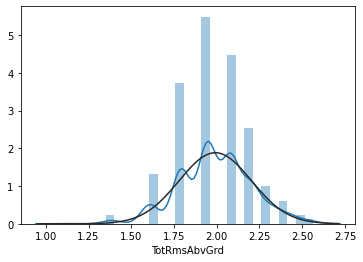

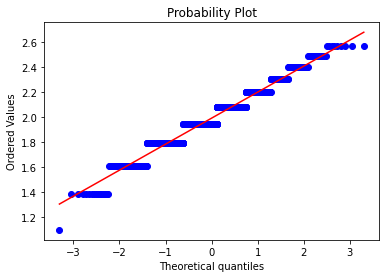

In [38]:
# BsmtFullBath
# train.columns
# print(train['TotRmsAbvGrd'].value_counts())
# print(train['TotRmsAbvGrd'].isnull().sum()/len(train))
train['TotRmsAbvGrd'] = np.log1p(train['TotRmsAbvGrd'])
sns.distplot(train['TotRmsAbvGrd'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotRmsAbvGrd'], plot=plt)

# test
test['TotRmsAbvGrd'] = test['TotRmsAbvGrd'].fillna(test['TotRmsAbvGrd'].mean())
test['TotRmsAbvGrd'] = np.log1p(test['TotRmsAbvGrd'])

In [39]:
# Functional
# print(train['Fireplaces'].value_counts())
# print(train['Fireplaces'].isnull().sum()/len(train))
train = train.drop('FireplaceQu',axis=1)

# test
test = test.drop('FireplaceQu',axis=1)

In [40]:
# print(train['GarageType'].value_counts())
# print(train['GarageType'].isnull().sum()/len(train))
train['GarageType'] = train['GarageType'].fillna('unknown')

# test
test['GarageType'] = test['GarageType'].fillna('unknown')

In [41]:
# GarageYrBlt
# print(train['GarageYrBlt'].value_counts())
# print(train['GarageYrBlt'].isnull().sum()/len(train))
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
# plt.plot(train['GarageYrBlt'],train['SalePrice'],'o')

# test
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

In [42]:
# GarageFinish
# print(train['GarageFinish'].value_counts())
# print(train['GarageFinish'].isnull().sum()/len(train))
train['GarageFinish'] = train['GarageFinish'].fillna('unknown')

# test
test['GarageFinish'] = test['GarageFinish'].fillna('unknown')

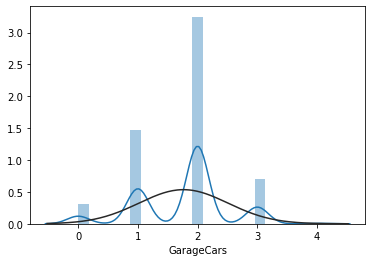

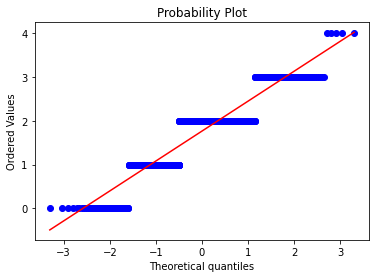

In [43]:
# print(train['GarageCars'].value_counts())
# print(train['GarageCars'].isnull().sum()/len(train))
# train['GarageCars'] = np.log1p(train['GarageCars'])
sns.distplot(train['GarageCars'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GarageCars'], plot=plt)

#test
test['GarageCars'] = test['GarageCars'].fillna(0)

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


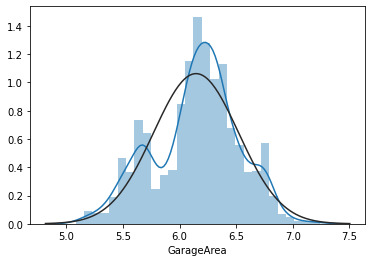

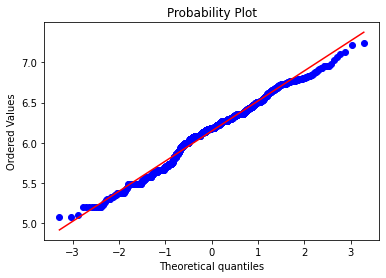

In [44]:
# GarageArea
# print(train['GarageArea'].value_counts())
# print(train['GarageArea'].isnull().sum()/len(train))
train['noGarageArea']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noGarageArea'][train['GarageArea'] == 0]  = 1
index = train['GarageArea'] > 0
train['GarageArea'] = np.log1p(train['GarageArea'])
sns.distplot(train['GarageArea'][index], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GarageArea'][index], plot=plt)

#test
test['GarageArea'] = test['GarageArea'].fillna(0)
test['noGarageArea']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noGarageArea'][test['GarageArea'] == 0]  = 1
test['GarageArea'] = np.log1p(test['GarageArea'])

In [45]:
# GarageQual
# print(train['GarageQual'].value_counts())
# print(train['GarageQual'].isnull().sum()/len(train))
train['GarageQual'] = train['GarageQual'].fillna('unknown')

#test
test['GarageQual'] = test['GarageQual'].fillna('unknown')

In [46]:
# GarageCond
# print(train['GarageCond'].value_counts())
# print(train['GarageCond'].isnull().sum()/len(train))
train['GarageCond'] = train['GarageCond'].fillna('unknown')

#test
test['GarageCond'] = test['GarageCond'].fillna('unknown')

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


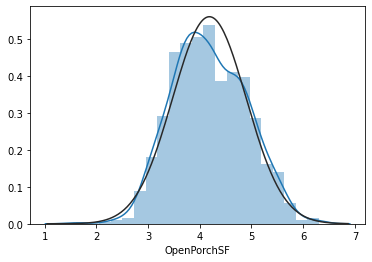

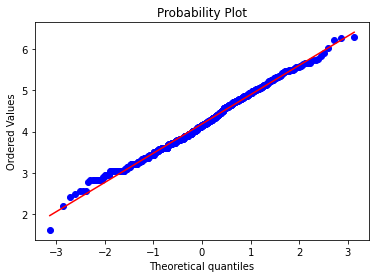

In [47]:
# WoodDeckSF
train['noOpenPorchSF']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noOpenPorchSF'][train['OpenPorchSF'] == 0]  = 1

index = train['OpenPorchSF'] > 0
train['OpenPorchSF'] = np.log1p(train['OpenPorchSF'])

sns.distplot(train['OpenPorchSF'][index], fit=norm);
fig = plt.figure()
res = stats.probplot(train['OpenPorchSF'][index], plot=plt)

#test
test['noOpenPorchSF']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noOpenPorchSF'][test['OpenPorchSF'] == 0]  = 1
test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


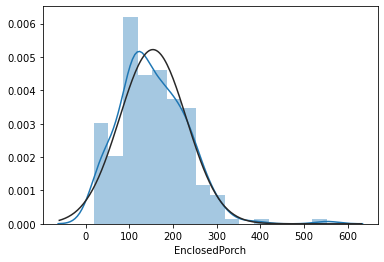

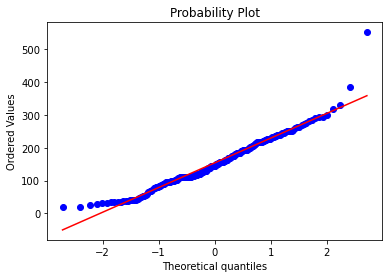

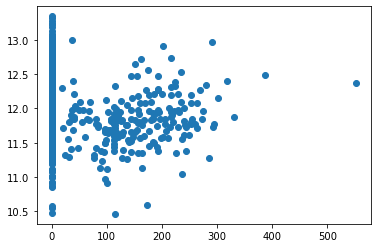

In [48]:
# EnclosedPorch
# print(train['EnclosedPorch'].value_counts())
train['noEnclosedPorch']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noEnclosedPorch'][train['EnclosedPorch'] == 0]  = 1

index = train['EnclosedPorch'] > 0

sns.distplot(train['EnclosedPorch'][index], fit=norm);
fig = plt.figure()
res = stats.probplot(train['EnclosedPorch'][index], plot=plt)
fig = plt.figure()
plt.plot(train['EnclosedPorch'],train['SalePrice'],'o')


#test
test['noEnclosedPorch']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noEnclosedPorch'][test['EnclosedPorch'] == 0]  = 1

In [49]:
# 3SsnPorch
train = train.drop('3SsnPorch',axis=1)

#test
test = test.drop('3SsnPorch',axis=1)

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


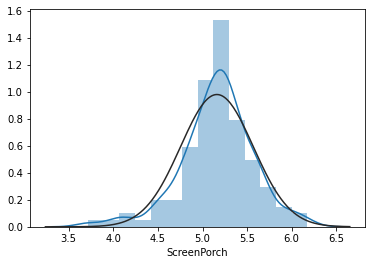

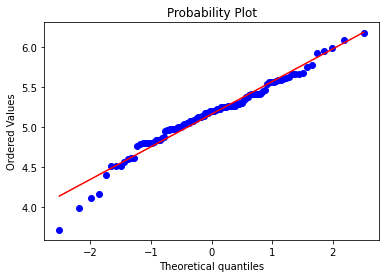

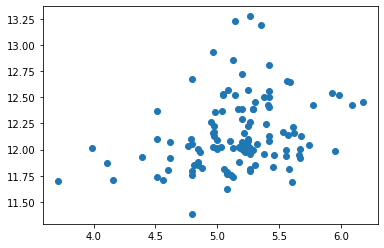

In [50]:
# ScreenPorch
train['noScreenPorch']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noScreenPorch'][train['ScreenPorch'] == 0]  = 1

index = train['ScreenPorch'] > 0
train['ScreenPorch'] = np.log1p(train['ScreenPorch'])
sns.distplot(train['ScreenPorch'][index], fit=norm);
fig = plt.figure()
res = stats.probplot(train['ScreenPorch'][index], plot=plt)
fig = plt.figure()
plt.plot(train['ScreenPorch'][index],train['SalePrice'][index],'o')

#test
test['noScreenPorch']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noScreenPorch'][test['ScreenPorch'] == 0]  = 1
test['ScreenPorch'] = np.log1p(test['ScreenPorch'])

In [51]:
# PoolArea
train = train.drop('PoolArea',axis=1)
train = train.drop('PoolQC',axis=1)

#test
test = test.drop('PoolArea',axis=1)
test = test.drop('PoolQC',axis=1)

In [52]:
# Fence
# print(train['MiscVal'].value_counts())
# print(train['MiscVal'].isnull().sum()/len(train))
train = train.drop('Fence',axis=1)
train = train.drop('MiscFeature',axis=1)
train = train.drop('MiscVal',axis=1)
train = train.drop('MoSold',axis=1)
train = train.drop('YrSold',axis=1)

#test
test = test.drop('Fence',axis=1)
test = test.drop('MiscFeature',axis=1)
test = test.drop('MiscVal',axis=1)
test = test.drop('MoSold',axis=1)
test = test.drop('YrSold',axis=1)

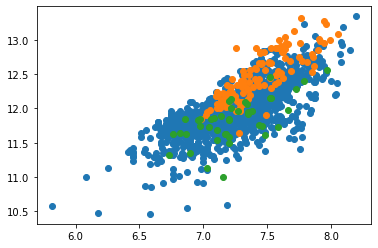

In [53]:
# MoSold
# print(train['SaleType'].value_counts())
# print(train['SaleType'].isnull().sum()/len(train))

plt.plot(train['GrLivArea'][train['SaleType'] == 'WD'],train['SalePrice'][train['SaleType'] == 'WD'],'o')
plt.plot(train['GrLivArea'][train['SaleType'] == 'New'],train['SalePrice'][train['SaleType'] == 'New'],'o')
plt.plot(train['GrLivArea'][train['SaleType'] == 'COD'],train['SalePrice'][train['SaleType'] == 'COD'],'o')

#test
test['SaleType'] = test['SaleType'].fillna('WD')

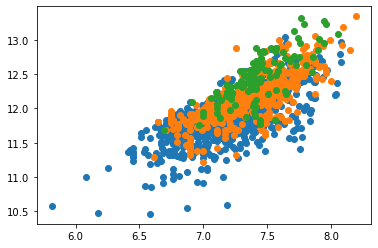

In [54]:
# MasVnrType
# print(train['MasVnrType'].value_counts())
train['MasVnrType'] = train['MasVnrType'].fillna('None')
plt.plot(train['GrLivArea'][train['MasVnrType'] == 'None'],train['SalePrice'][train['MasVnrType'] == 'None'],'o')
plt.plot(train['GrLivArea'][train['MasVnrType'] == 'BrkFace'],train['SalePrice'][train['MasVnrType'] == 'BrkFace'],'o')
plt.plot(train['GrLivArea'][train['MasVnrType'] == 'Stone'],train['SalePrice'][train['MasVnrType'] == 'Stone'],'o')

#test
test['MasVnrType'] = test['MasVnrType'].fillna('None')

C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hrne\anaconda3\envs\testAI\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


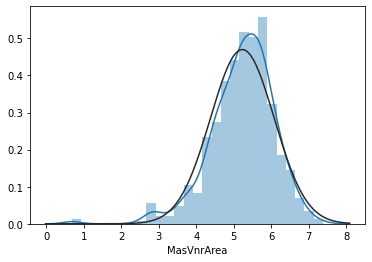

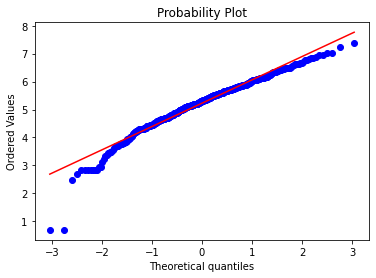

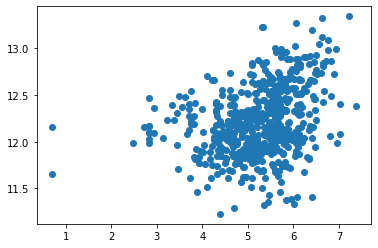

In [55]:
# MasVnrArea
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['noMasVnrArea']  = pd.Series(np.zeros((len(train))),index = train.index)
train['noMasVnrArea'][train['MasVnrArea'] == 0]  = 1

index = train['MasVnrArea'] > 0
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
sns.distplot(train['MasVnrArea'][index], fit=norm);
fig = plt.figure()
res = stats.probplot(train['MasVnrArea'][index], plot=plt)
fig = plt.figure()
plt.plot(train['MasVnrArea'][index],train['SalePrice'][index],'o')

#test
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['noMasVnrArea']  = pd.Series(np.zeros((len(test))),index = test.index)
test['noMasVnrArea'][test['MasVnrArea'] == 0]  = 1
test['MasVnrArea'] = np.log1p(test['MasVnrArea'])

In [56]:
# BsmtFinType2
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')
# print(train['BsmtFinType2'].value_counts())
# print(train['BsmtFinType2'].isnull().sum()/len(train))

#test
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')

In [57]:
# print(train['Exterior2nd'].value_counts())
# print(train['Exterior2nd'].isnull().sum()/len(train))

test['KitchenQual'] = test['KitchenQual'].fillna('TA')
test['Functional'] = test['Functional'].fillna('Typ')
test['Exterior1st'] = test['Exterior1st'].fillna('unknown')
test['Exterior2nd'] = test['Exterior2nd'].fillna('unknown')
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)

In [58]:
print(train.isnull().sum().max())
# print(test.isnull().sum().sort_values(ascending=False))
print(test.isnull().sum().max())

0
0


In [59]:
corr=numeric_features.corr()
print (corr['SalePrice'].sort_values()[:])

NameError: name 'numeric_features' is not defined

Index(['SalePrice', 'totalArea', 'OverallQual', 'GrLivArea', 'GarageCars',
       '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'OpenPorchSF', 'GarageArea', 'MasVnrArea'],
      dtype='object')


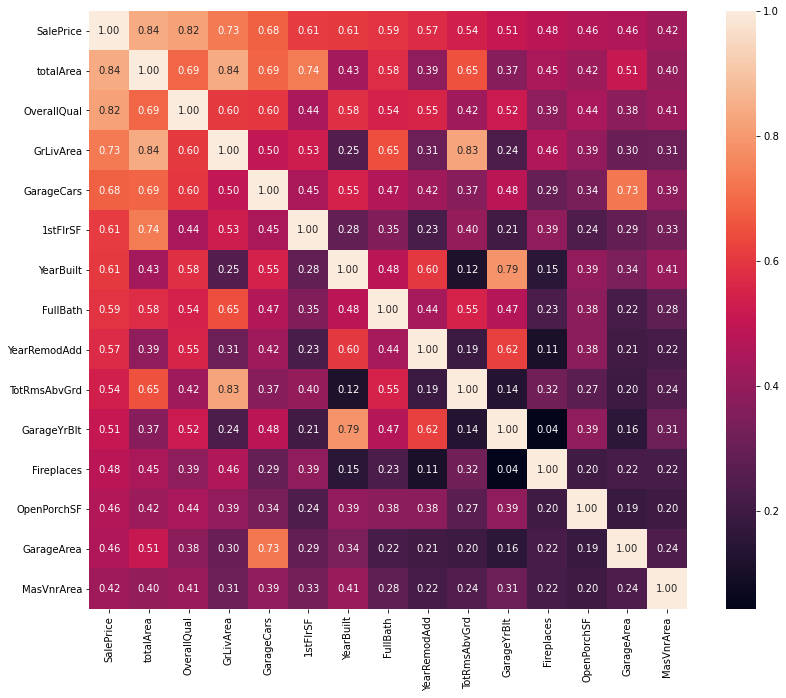

In [60]:

corrmat = train.corr()
k = 15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = train[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.show()

In [ ]:
concat_data = pd.concat([train,test])

# one-hot
dummies_data = pd.get_dummies(concat_data.drop('SalePrice', axis=1))

# 归一化
dummies_data = StandardScaler().fit_transform(dummies_data)
X = dummies_data[:len(train)]
print(X.shape)
submission_data = dummies_data[-len(test):]
print(submission_data.shape)
y = concat_data.iloc[:len(train)]['SalePrice'].values

In [ ]:
#train model
from sklearn.model_selection import train_test_split
X1=train.select_dtypes(include=[np.number]).fillna(0)
X=X1.drop(['SalePrice','Id'],axis=1)
y=train.SalePrice

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
#pred price
y_pred=lr.predict(X_test)

In [ ]:
actual_value=y_test
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.title("SalePrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

In [ ]:
#train model with xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
model= XGBRegressor()
model.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.title("SalePrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

In [ ]:
print(model.feature_importances_)

In [ ]:
from xgboost import plot_importance
ax=plot_importance(model)
fig=ax.figure
fig.set_size_inches(10,10)


In [ ]:
answer=pd.DataFrame()
answer['Id']=test.Id
feats=test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).fillna(0)
pred_f=model.predict(feats)

#exp()
pred_result=pred_f
print (pred_f[:5])
print (pred_result[:5])

In [ ]:
answer['SalePrice']=pred_result
answer.head()

In [ ]:
#export the result file
answer.to_csv("Result.csv",index=False)